In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
import numpy as np
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('../mlcourse.ai/data_files/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 20)

### Convert International plan,  Voice mail plan and Churn features to 0 and 1 type

In [5]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [6]:
df['Churn'] = df['Churn'].astype('int')

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Histogram (works only for numeric data)

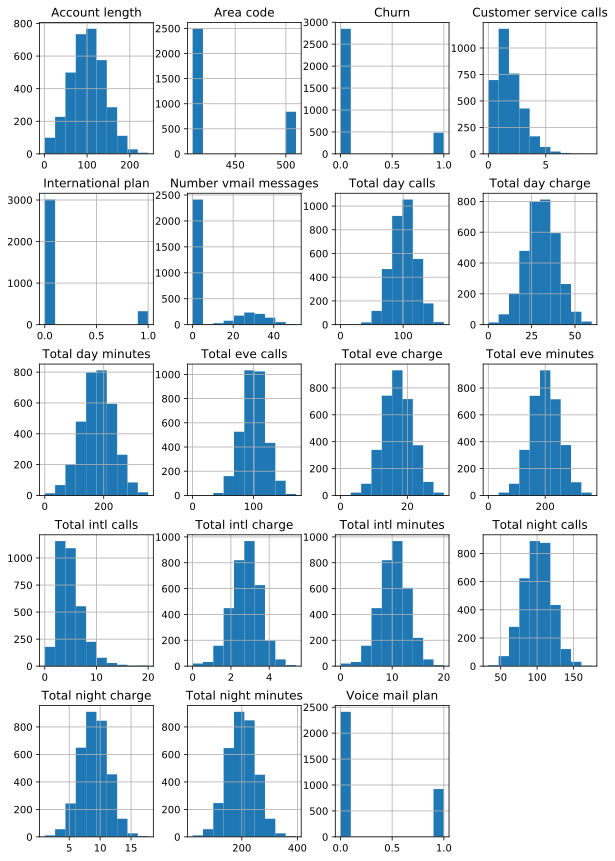

In [8]:
plt.rcParams['figure.figsize'] = 10, 15
df.drop(['State'], axis = 1).hist();  # semicolon at the end to hide unwanted outputs while generating plots

### Building correlation matrix

In [9]:
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


### Generate heatmap of correlation

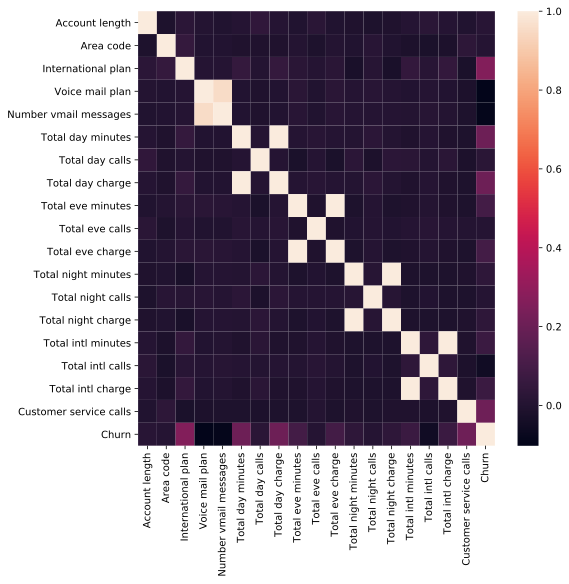

In [10]:
plt.rcParams['figure.figsize'] = 8, 8
sns.heatmap(df.corr());

We observe that charges are propertional to the number of minutes. For linear models, it can be a problem if two features are proportional (correlation=1). For decision trees, random forests, boosting based methods, this is not a problem.

### Dropping redundant features

In [11]:
cols_to_drop = [feature_name for feature_name in df.columns if 'charge' in feature_name]
df.drop(cols_to_drop, axis = 1, inplace = True)

In [12]:
df.shape

(3333, 16)

In [13]:
tsne = TSNE(random_state=17)

In [14]:
%%time
X_repr = tsne.fit_transform(df.drop(['State'], axis = 1))

CPU times: user 2min 5s, sys: 6.92 s, total: 2min 12s
Wall time: 2min 12s


In [15]:
X_repr.shape

(3333, 2)

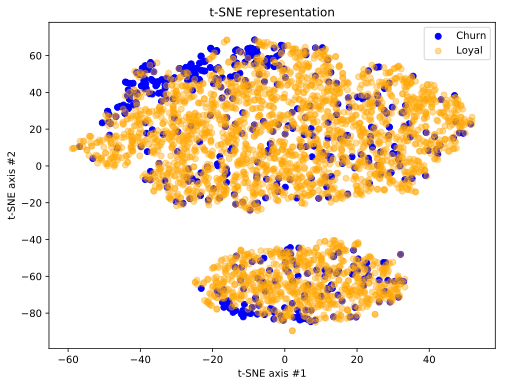

In [16]:
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(X_repr[df['Churn'] == 1, 0], X_repr[df['Churn'] == 1, 1], alpha = 1, c = 'blue', label = 'Churn');
plt.scatter(X_repr[df['Churn'] == 0, 0], X_repr[df['Churn'] == 0, 1], alpha = 0.4, c = 'orange', label = 'Loyal');
plt.title('t-SNE representation');
plt.legend();
plt.xlabel('t-SNE axis #1');
plt.ylabel('t-SNE axis #2');
plt.savefig('t-SNE for Churn', dpi = 300)

<img src = "t-SNE for Churn.png" width="50%" height="30%">

## Visualizing individual features

### Numeric data

In [17]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

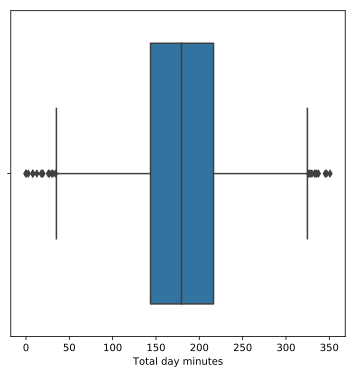

In [18]:
plt.rcParams['figure.figsize'] = 6,6
sns.boxplot(x='Total day minutes', data = df);

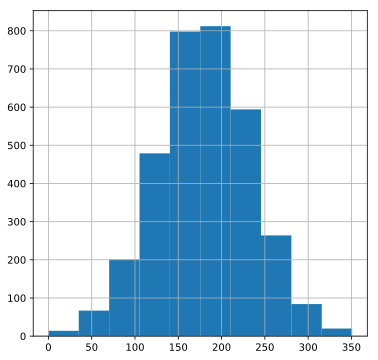

In [19]:
plt.rcParams['figure.figsize'] = 6,6
df['Total day minutes'].hist();

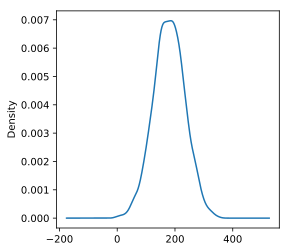

In [20]:
plt.rcParams['figure.figsize'] = 4, 4
df['Total day minutes'].plot(kind='density');

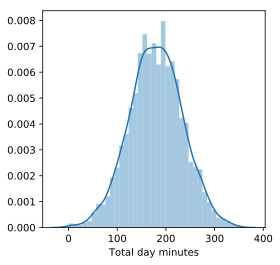

In [21]:
sns.distplot(df['Total day minutes']);

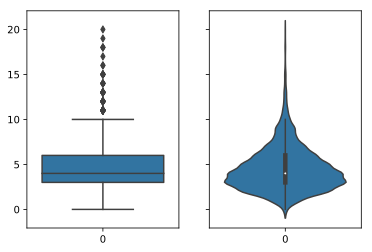

In [22]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

### Categorical data

In [23]:
df['State'].nunique()

51

In [24]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
WA     66
NV     66
CO     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [25]:
df['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

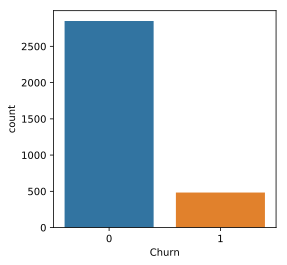

In [26]:
sns.countplot(x = 'Churn', data = df);

## Interaction between features

### Numeric-numeric interaction

This type of analysis is better when target value is a continuous variable (Regresssion tasks)

In [27]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

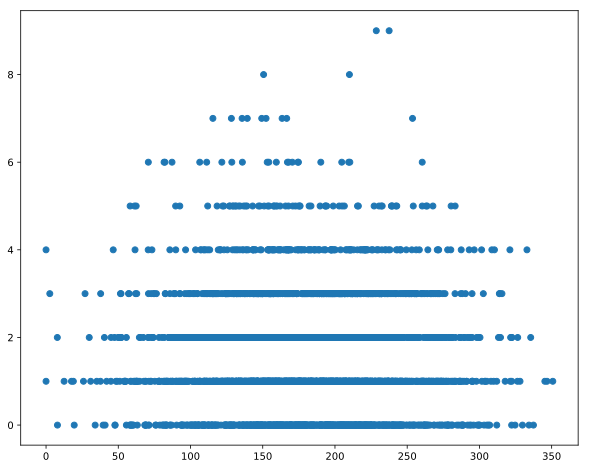

In [28]:
plt.rcParams['figure.figsize'] = 10, 8
plt.scatter(df['Total day minutes'], df['Customer service calls']);

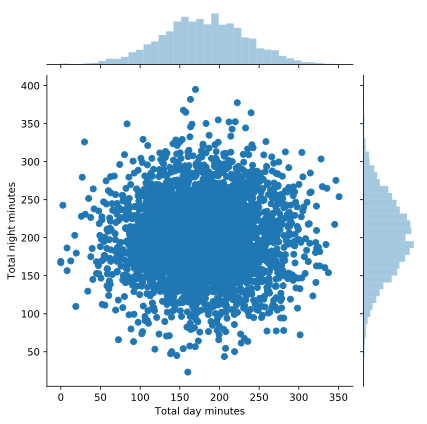

In [29]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

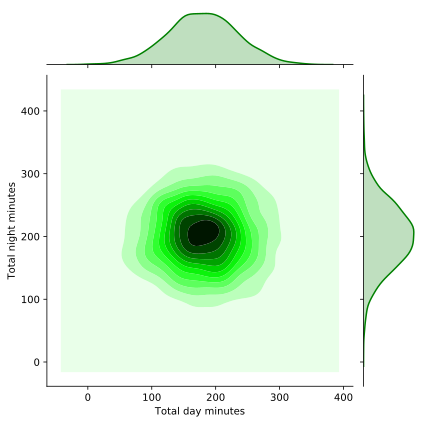

In [30]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df, kind="kde", color="g");

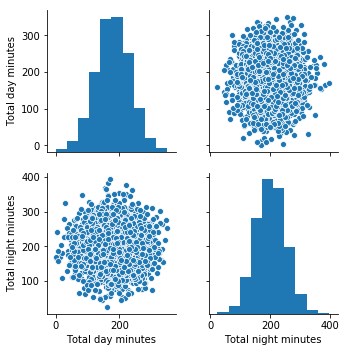

In [31]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['Total day minutes', 'Total night minutes']]);

### Categorical-categorical interaction

In [32]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


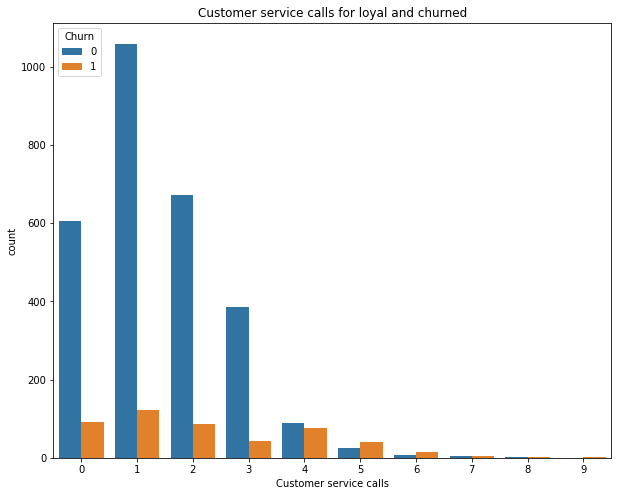

In [33]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df);
plt.title('Customer service calls for loyal and churned');

### Categorical-numeric interaction

In [34]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.mean, np.median, np.std])

Total day minutes                   Customer service calls         \
                   mean median        std                   mean median   
Churn                                                                     
0            175.175754  177.2  50.181655               1.449825      1   
1            206.914079  217.6  68.997792               2.229814      2   

                 
            std  
Churn            
0      1.163883  
1      1.853275

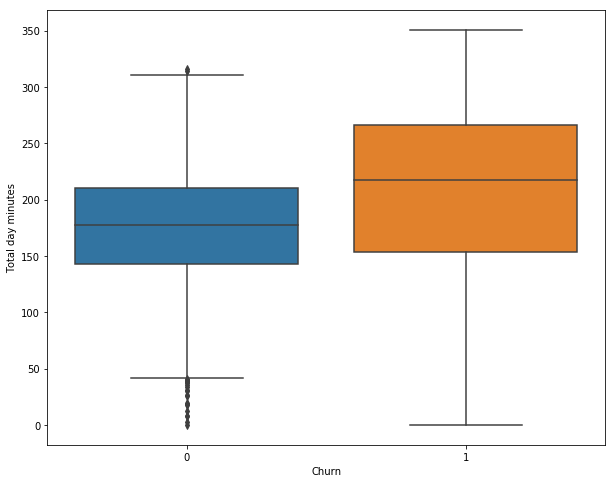

In [35]:
sns.boxplot(x = 'Churn', y = 'Total day minutes', data = df);